In [1]:
import numpy as np 
from scipy.optimize import minimize 

/home/jeffy011/miniconda3/envs/msse-python/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import time

def timeit(f):

    def timed(*args, **kw):

        ts = time.time()
        result = f(*args, **kw)
        te = time.time()

        print('func:%r took: %2.4f sec' % (f.__name__,  te-ts))
        return result

    return timed

In [3]:
%matplotlib notebook
def draw_path(func,path,x_min=-2,x_max=2,y_min=-2,y_max=2):
    a=np.linspace(x_min,x_max,100)
    b=np.linspace(y_min,y_max,100)
    x,y=np.meshgrid(a,b)
    z=func((x,y))
    fig,ax=plt.subplots()
    my_contour=ax.contour(x,y,z,50)
    plt.colorbar(my_contour)
    ax.plot(path[:,0],path[:,1])

# Question 1 

### 1. Bisection vs. Golden Section. In class we used the simple bisection method  to  take  the  first  step  in  isolating  at  least  one  minimum  for  the function  shown.  This  first  step  in  placement  of  d  reduced  the  original interval [a,b,c] =1.0 to [a,b,d] = 0.75.  But in general, the average size interval  [L]  after  Step  1  is  determined  by  the  equal  probability  of placing point d in  either sub-interval, such that [L1] =P(left-interval) x  ½ + P(right-interval) x ¾ = 0.625 (since you can’t a priori know the best half) 

#### (a) For step 2, place point e at the bisector of larger interval [a,b]. Why is this better than [b,d]? 
##### It is better to place the bisector a the larger interval as there is a higher probability of finding the minima at the large search space than it is in smaller space, which in this case is [a,b] and the smaller space is [b,d]. 

#### (b) What is the new interval and how much is the search space reduced? 
##### Based on the image provided, the new interval is [a,e,b] and the search space is reduced by 1/3. The total new search space is 2/3. 

#### (c) For step 3, reduce the size of the interval from step 2 by placing point f at the bisection of your choice. 
##### I chose to place point f in the bisection of [a,e], creating a new search space of triplets [f,e,b]. This reduces the search space by 1/4 and the new search space is 3/4 of [a,e,b]. 

#### (d) fill in tree for all possible size intervals for steps 2 and 3. Write your answers in ratios to the interval size of the previous step. 
##### 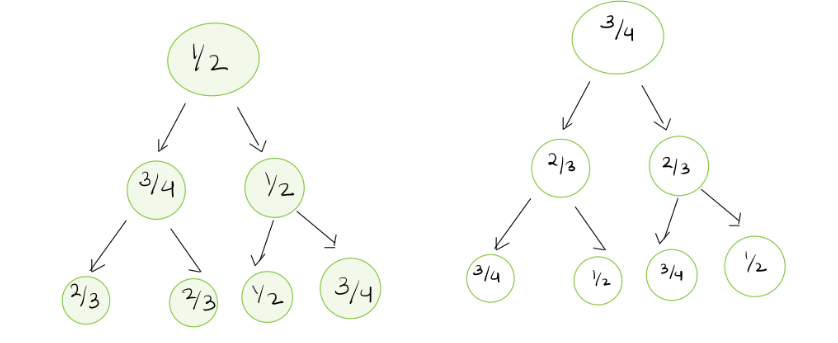

#### (e) What is average size of interval at steps 2 and 3? 
##### 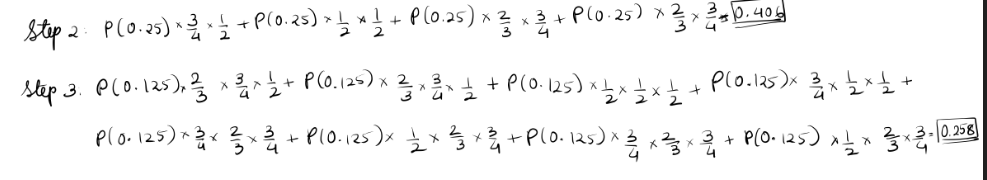

#### (f)  How  much  does  Golden  Section  improve  over  Bisection  at  each  step?  Please  use  a  chart  of steps v.s. different methods to show their difference. 
##### 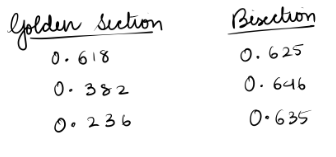

# Question 2 

### 2. Local optimization using 1st and quasi-2nd order methods. You will solve the following optimization problem using  a  python  code  you  develop  for  the  steepest  descents method! For the function  𝑓(𝑥,𝑦)=𝑥4 −𝑥2 +𝑦2 +2𝑥𝑦−2 there  are  three  stationary  points  found  over  the  range  x  =  [-2,2] and y = [-2,2].

#### (a)  Starting  from  point  (1.5,1.5),  and  with  stepsize  =0.1, determine  new (𝑥,𝑦) position  using  one  step  of  the  steepest descent algorithm (check against the debugging output). Is it a good optimization step? Depending on this outcome, how will you change the stepsize in the next step? 

In [4]:
# The function is f(x,y) = x^4 - x^2 + +y^2 +2xy -2  

def f(starting_point):
    x = starting_point[0]
    y = starting_point[1]
    return x**4 - x**2 + y**2 + 2*x*y - 2

def dfdx(points):
    x = points[0]
    y = points[1]
    return 4*x**3 - 2*x + 2*y

def dfdy(points):
    x = points[0]
    y = points[1]
    return 2*y + 2*x

def steepest_descent(x,y,stepsize):
    x_new = x - stepsize*dfdx([x,y])
    y_new = y - stepsize*dfdy([x,y])
    return x_new, y_new

x = 1.5 
y = 1.5 
stepsize = 0.1 
x_new, y_new = steepest_descent(x,y,stepsize)
print(f'The new x and y values are: {steepest_descent(x,y,stepsize)}')
print(f'The function evaluation with x0 and y0 is: {f([x,y])}')
print(f'The function evaluation with x1 and y1 is: {f([x_new, y_new])}')

The new x and y values are: (0.1499999999999999, 0.8999999999999999)
The function evaluation with x0 and y0 is: 7.5625
The function evaluation with x1 and y1 is: -0.9419937500000004


##### The new function evaluation is lower than the initial value, thus it can be established that this is a good step. 

#### b) Implement  the  steepest  decent  using  the  provided  template.  Continue  executing  steepest descents. How many steps does it take to converge to the local minimum to tolerance = 1 x 10-5 of the gradient (check against the debugging output and compare code timings)? Note: You don’t need to use line search, just take one step in the search direction, and use the following stepsize update: 𝜆={1.2 𝜆 𝑓𝑜𝑟 𝑎 𝑔𝑜𝑜𝑑 𝑠𝑡𝑒𝑝 and 0.5 𝜆 𝑓𝑜𝑟 𝑎 𝑏𝑎𝑑 𝑠𝑡𝑒𝑝 

In [5]:
from pylab import *
import numpy.linalg as LA

def f(starting_point):
    x = starting_point[0]
    y = starting_point[1]
    return x**4 - x**2 + y**2 + 2*x*y - 2

def dfdx(points):
    x = points[0]
    y = points[1]
    return 4*x**3 - 2*x + 2*y

def dfdy(points):
    x = points[0]
    y = points[1]
    return 2*y + 2*x

@timeit
def steepest_descent(func,first_derivate,starting_point,stepsize,tol):
    # evaluate the gradient at starting point
    deriv_x = first_derivate[0]([starting_point[0],starting_point[1]])
    deriv_y = first_derivate[1]([starting_point[0],starting_point[1]])
    deriv = np.array([deriv_x,deriv_y])
    # initialize the counter
    count=0
    visited=[]
    visited.append(starting_point)
    while LA.norm(deriv) > tol and count < 1e6:
        # calculate new point position
        new_point_x = starting_point[0] - stepsize*deriv[0]
        new_point_y = starting_point[1] - stepsize*deriv[1]
        if func([new_point_x, new_point_y]) < func([starting_point[0], starting_point[1]]):
            # the step makes function evaluation lower - it is a good step. what do you do?
            stepsize = stepsize*1.2
            visited.append(np.array([new_point_x,new_point_y]))
            starting_point = np.array([new_point_x,new_point_y])
            deriv_x = first_derivate[0]([starting_point[0],starting_point[1]])
            deriv_y = first_derivate[1]([starting_point[0],starting_point[1]])
            deriv = np.array([deriv_x,deriv_y])
            
        else:
            # the step makes function evaluation higher - it is a bad step. what do you do?
            stepsize = stepsize*0.5
            visited.append(np.array([new_point_x,new_point_y]))
            starting_point = np.array([new_point_x,new_point_y])
            deriv_x = first_derivate[0]([starting_point[0],starting_point[1]])
            deriv_y = first_derivate[1]([starting_point[0],starting_point[1]])
            deriv = np.array([deriv_x,deriv_y])
        count+=1
    # return the results
    return {"count":count, "x":starting_point,"evaluation":func([starting_point[0], starting_point[1]]),"path":np.asarray(visited)}

# define the starting point
starting_point = np.array([1.5,1.5])
# define the stepsize
stepsize = 0.1
# define the tolerance
tol = 1e-5
# call the function
# set the derivative 
deriv = np.array([dfdx, dfdy])
result = steepest_descent(f, deriv,starting_point,stepsize,tol)
print(result)

func:'steepest_descent' took: 0.0020 sec
{'count': 45, 'x': array([-0.99999892,  0.99999943]), 'evaluation': -2.999999999995068, 'path': array([[ 1.5       ,  1.5       ],
       [ 0.15      ,  0.9       ],
       [-0.03162   ,  0.648     ],
       [-0.22733235,  0.47048256],
       [-0.4603766 ,  0.38644985],
       [-0.73063964,  0.41710875],
       [-0.91361447,  0.57314178],
       [-0.89067253,  0.77647099],
       [-1.072703  ,  0.85831194],
       [-0.88004038,  0.93513214],
       [-1.07440969,  0.91144369],
       [-0.8191814 ,  0.99553056],
       [-1.00371455,  0.95003442],
       [-0.98247032,  0.96665308],
       [-1.00196259,  0.97252925],
       [-0.98533102,  0.98565078],
       [-1.0162044 ,  0.98547972],
       [-0.99022477,  0.99369805],
       [-1.00370679,  0.9925832 ],
       [-0.9936794 ,  0.99686773],
       [-1.00672832,  0.99539405],
       [-0.99782619,  0.99801346],
       [-1.00028169,  0.99796153],
       [-0.99913443,  0.99873366],
       [-1.00035525,  0

##### It took 45 steps to converge to the minimum of (-1, 1) with 0.0040 sec. According to the debugging output, it took 41 steps to converge with 0.0020 sec. The results are comparable and very similar.

#### (c) Compare your steepest descent code against conjugate gradients (CG), and BFGS to determine the local minimum starting from (1.5,1.5). In terms of number of steps, are conjugate gradients and/or BFGS more efficient than steepest descents? Note: See SciPy documentation on how to use CG  and BFGS, examples available  at the end of webpage: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html 

In [6]:
#CG methods 
res = minimize(f, starting_point, method='CG', options={'disp':True, 'gtol':1e-5})
print(res)

Optimization terminated successfully.
         Current function value: -3.000000
         Iterations: 9
         Function evaluations: 78
         Gradient evaluations: 26
     fun: -2.9999999999995843
     jac: array([ 2.08616257e-07, -1.10268593e-06])
 message: 'Optimization terminated successfully.'
    nfev: 78
     nit: 9
    njev: 26
  status: 0
 success: True
       x: array([-0.99999984,  0.99999928])


In [7]:
#BFGS methods 
res = minimize(f, starting_point, method='BFGS', options={'disp':True, 'gtol':1e-5})
print(res)

Optimization terminated successfully.
         Current function value: -3.000000
         Iterations: 7
         Function evaluations: 24
         Gradient evaluations: 8
      fun: -2.9999999999998184
 hess_inv: array([[ 0.12457747, -0.12457762],
       [-0.12457762,  0.62569996]])
      jac: array([-1.63912773e-06, -2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([ 0.99999979, -0.99999979])


##### CG took approximately 9 steps to converge and BFGS took approximately 7 steps to converge. On the other hand, steepest descent had ~50 steps to converge. Thus, it can be concluded that both BFGS and CG are more efficient than steepest descent. 

# Question 3 

### 3. Local optimization and machine learning using Stochastic Gradient Descent (SGD). The Rosenbrock Banana Function looks innocuous enough 𝑓(𝑥,𝑦)=(1−𝑥)2 +10(𝑦−𝑥2)2 with only one (global) minimum at (𝑥,𝑦)=(1.0,1.0)! .

#### (a)  Starting  at  𝑥 =−0.5 and  𝑦=1.5,  and  using  your  code  for  steepest descents with stepsize =0.1, how many steps to converge to the minimum? Use a tolerance = 1 x 10-5 

In [8]:
def f(starting_point):
    x = starting_point[0]
    y = starting_point[1]
    return (1-x)**2 + 10*(y-x**2)**2

def dfdx(points):
    x = points[0]
    y = points[1]
    return -2*(1-x) - 40*x*(y-x**2)

def dfdy(points):
    x = points[0]
    y = points[1]
    return 20*(y-x**2)

# define the starting point
starting_point = np.array([-0.5,1.5])
# define the stepsize
stepsize = 0.1
# define the tolerance
tol = 1e-5
# call the function
# set the derivative 
deriv = np.array([dfdx, dfdy])
result = steepest_descent(f, deriv,starting_point,stepsize,tol)
print(result)

func:'steepest_descent' took: 0.0031 sec
{'count': 8, 'x': array([nan, inf]), 'evaluation': nan, 'path': array([[-5.00000000e-001,  1.50000000e+000],
       [-2.70000000e+000, -1.00000000e+000],
       [ 4.24360000e+001,  7.29000000e+000],
       [-7.60696243e+004,  9.04052048e+002],
       [ 2.20091744e+014,  1.44664761e+009],
       [-2.66533168e+042,  6.05504695e+027],
       [ 2.36681219e+126,  4.43999561e+083],
       [            -inf,  1.75056248e+251],
       [             nan,              inf]])}


/tmp/ipykernel_139/1898835366.py:4: RuntimeWarning: overflow encountered in double_scalars
  return (1-x)**2 + 10*(y-x**2)**2
/tmp/ipykernel_139/1898835366.py:9: RuntimeWarning: overflow encountered in double_scalars
  return -2*(1-x) - 40*x*(y-x**2)
/tmp/ipykernel_139/2162864786.py:31: RuntimeWarning: invalid value encountered in double_scalars
  new_point_x = starting_point[0] - stepsize*deriv[0]


##### Interestingly, Steepest descent could not get to a minimum using the stepsize of 0.1. The run terminated after 8 iterations and took 0.0030 seconds. When I ran the algorithm with 0.01 stepsize instead of 0.1, the algorithm converged nicely but it took over 1000 steps and 0.0640 steps. A solution to this could be utilizing another algorithm that converges faster with the stepsize of 0.1 

#### (b) By adding a small amount of stochastic noise to the gradient at every step (In your code add a random vector that is the same norm as the gradient at that step), which is equivalent to a small batch  derivative  of  any  loss  function  in  deep  learning,  implement  your  own  stochastic  gradient descent  code  by  modifying  on  your  steepest  descent  code,  and  run  the  SGD  algorithm.  (Check against debugging outputs.) 

In [9]:
@timeit
def stochastic_gradient_descent(func,first_derivate,starting_point,stepsize,tol=1e-5,stochastic_injection=1):
    '''stochastic_injection: controls the magnitude of stochasticity (multiplied with stochastic_deriv)
        0 for no stochasticity, equivalent to SD. 
        Use 1 in this homework to run SGD
    '''
    # evaluate the gradient at starting point
    deriv_x = first_derivate[0]([starting_point[0],starting_point[1]])
    deriv_y = first_derivate[1]([starting_point[0],starting_point[1]])
    deriv = np.array([deriv_x,deriv_y])
    count=0
    visited=[]
    visited.append(starting_point)
    while LA.norm(deriv) > tol and count < 1e5:
        if stochastic_injection>0:
            # formulate a stochastic_deriv that is the same norm as your gradient 
            # but has a random direction
            stochastic_deriv=np.random.normal(0,1,2)
            stochastic_deriv=stochastic_deriv/LA.norm(stochastic_deriv)*LA.norm(deriv)

        else:
            stochastic_deriv=np.zeros(len(starting_point))
        direction=-(deriv+stochastic_injection*stochastic_deriv)
        # calculate new point position
        new_point_x = starting_point[0] + stepsize*direction[0]
        new_point_y = starting_point[1] + stepsize*direction[1]
        new_point = np.array([new_point_x,new_point_y])

        if func(new_point) < func(starting_point):
            # the step makes function evaluation lower - it is a good step. what do you do?
            starting_point = new_point
            deriv_x = first_derivate[0]([starting_point[0],starting_point[1]])
            deriv_y = first_derivate[1]([starting_point[0],starting_point[1]])
            deriv = np.array([deriv_x,deriv_y])
            stepsize = stepsize*1.2

            
        else:
            # the step makes function evaluation higher - it is a bad step. what do you do?
            starting_point = new_point
            deriv_x = first_derivate[0]([starting_point[0],starting_point[1]])
            deriv_y = first_derivate[1]([starting_point[0],starting_point[1]])
            deriv = np.array([deriv_x,deriv_y])
            stepsize = stepsize*0.5
        visited.append(starting_point)
        count+=1
    return {"count":count, "x":starting_point,"evaluation":func(starting_point),"path":np.asarray(visited)}

# define the starting point
starting_point = np.array([-0.5,1.5])
# define the stepsize
stepsize = 0.01
# define the tolerance
tol = 1e-5
# call the function
# set the derivative 
deriv = np.array([dfdx, dfdy])
result = stochastic_gradient_descent(f,deriv,starting_point,stepsize,tol=tol,stochastic_injection=1)
print(result)

func:'stochastic_gradient_descent' took: 0.1129 sec
{'count': 2134, 'x': array([0.99998931, 0.99997823]), 'evaluation': 1.1578409920417465e-10, 'path': array([[-0.5       ,  1.5       ],
       [-0.39436664,  1.31973459],
       [-0.81838049,  0.80201401],
       ...,
       [ 0.99998919,  0.99997781],
       [ 0.99998929,  0.99997793],
       [ 0.99998931,  0.99997823]])}


##### It took 1640 steps to converge to the global minimum of (1,1) and took 0.0857 sec. This is comparable to the debugging output of ~1700 steps with ~0.1 seconds. It is important to note that this algorithm also did not converge initially and I had to change the step size to get the correct results as mentioned in the debugging output. I dont necessarily agree that this algorithm is better than steepest descent algorithm as the number of steps and the amount of time it takes to converge is the same for both.

#### (c) evaluate how much better or worse is the SGD convergence against the CG or BFGS method to find the global minimum, in terms of number of steps. Converge function/gradient to tolerance =1 × 10-5 

In [10]:
#CG methods 
res = minimize(f, starting_point, method='CG', options={'disp':True, 'gtol':1e-5})
print(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 132
         Gradient evaluations: 44
     fun: 2.0711814827200667e-13
     jac: array([ 4.94555024e-08, -2.45172016e-08])
 message: 'Optimization terminated successfully.'
    nfev: 132
     nit: 20
    njev: 44
  status: 0
 success: True
       x: array([0.99999955, 0.99999908])


In [11]:
#CG methods 
res = minimize(f, starting_point, method='BFGS', options={'disp':True, 'gtol':1e-5})
print(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 93
         Gradient evaluations: 31
      fun: 1.6856836004019217e-13
 hess_inv: array([[0.50988602, 1.01962714],
       [1.01962714, 2.08896666]])
      jac: array([ 1.15312325e-07, -1.29424893e-08])
  message: 'Optimization terminated successfully.'
     nfev: 93
      nit: 22
     njev: 31
   status: 0
  success: True
        x: array([0.99999959, 0.99999917])


##### Just by running both algorithms once, it is clear that both BFGS and CG methods converge faster than compared to steepest descent and stochastic steepest descent algorithms.  Using BFGS and CG methods, the convergence was completed in ~20 steps, which is much better than both stochastic and steepest descent, which either wont converge or will converge after over 2000 steps. 

#### d) Can  you  draw  a  firm  conclusion  on  the  outcome  with  just  one  run  of  each  method?  If  not, explain why 

##### Since there is only one minimum, we can surely make a firm conclusion on the outcome with just one run of each method; however, if there were more than one minima, then it would have been harder to draw a conclusion and multiple runs will need to be performed to declare a final solution. 

#### e) Run all of the algorithms multiple times starting at different (x,y) positions to understand the average performance of each. Explain the relative performance of the non-stochastic and stochastic methods on the Rosenbrock Banana Function.

In [12]:
#run all the algorithms multiple times to get the average amount of steps it takes to converge. 
def f(starting_point):
    x = starting_point[0]
    y = starting_point[1]
    return (1-x)**2 + 10*(y-x**2)**2

def dfdx(points):
    x = points[0]
    y = points[1]
    return -2*(1-x) - 40*x*(y-x**2)

def dfdy(points):
    x = points[0]
    y = points[1]
    return 20*(y-x**2)

def steepest_descent_count(func,first_derivate,starting_point,stepsize,tol=1e-5):
    # evaluate the gradient at starting point
    deriv_x = first_derivate[0]([starting_point[0],starting_point[1]])
    deriv_y = first_derivate[1]([starting_point[0],starting_point[1]])
    deriv = np.array([deriv_x,deriv_y])
    # initialize the counter
    count=0
    visited=[]
    visited.append(starting_point)
    while LA.norm(deriv) > tol and count < 1e6:
        # calculate new point position
        new_point_x = starting_point[0] - stepsize*deriv[0]
        new_point_y = starting_point[1] - stepsize*deriv[1]
        if func([new_point_x, new_point_y]) < func([starting_point[0], starting_point[1]]):
            # the step makes function evaluation lower - it is a good step. what do you do?
            stepsize = stepsize*1.2
            visited.append(np.array([new_point_x,new_point_y]))
            starting_point = np.array([new_point_x,new_point_y])
            deriv_x = first_derivate[0]([starting_point[0],starting_point[1]])
            deriv_y = first_derivate[1]([starting_point[0],starting_point[1]])
            deriv = np.array([deriv_x,deriv_y])
            
        else:
            # the step makes function evaluation higher - it is a bad step. what do you do?
            stepsize = stepsize*0.5
            visited.append(np.array([new_point_x,new_point_y]))
            starting_point = np.array([new_point_x,new_point_y])
            deriv_x = first_derivate[0]([starting_point[0],starting_point[1]])
            deriv_y = first_derivate[1]([starting_point[0],starting_point[1]])
            deriv = np.array([deriv_x,deriv_y])
        count+=1
    # return the results
    return count

def stochastic_gradient_descent_count(func,first_derivate,starting_point,stepsize,tol=1e-5,stochastic_injection=1):
    '''stochastic_injection: controls the magnitude of stochasticity (multiplied with stochastic_deriv)
        0 for no stochasticity, equivalent to SD. 
        Use 1 in this homework to run SGD
    '''
    # evaluate the gradient at starting point
    deriv_x = first_derivate[0]([starting_point[0],starting_point[1]])
    deriv_y = first_derivate[1]([starting_point[0],starting_point[1]])
    deriv = np.array([deriv_x,deriv_y])
    count=0
    visited=[]
    visited.append(starting_point)
    while LA.norm(deriv) > tol and count < 1e5:
        if stochastic_injection>0:
            # formulate a stochastic_deriv that is the same norm as your gradient 
            # but has a random direction
            stochastic_deriv=np.random.normal(0,1,2)
            stochastic_deriv=stochastic_deriv/LA.norm(stochastic_deriv)*LA.norm(deriv)

        else:
            stochastic_deriv=np.zeros(len(starting_point))
        direction=-(deriv+stochastic_injection*stochastic_deriv)
        # calculate new point position
        new_point_x = starting_point[0] + stepsize*direction[0]
        new_point_y = starting_point[1] + stepsize*direction[1]
        new_point = np.array([new_point_x,new_point_y])

        if func(new_point) < func(starting_point):
            # the step makes function evaluation lower - it is a good step. what do you do?
            starting_point = new_point
            deriv_x = first_derivate[0]([starting_point[0],starting_point[1]])
            deriv_y = first_derivate[1]([starting_point[0],starting_point[1]])
            deriv = np.array([deriv_x,deriv_y])
            stepsize = stepsize*1.2

            
        else:
            # the step makes function evaluation higher - it is a bad step. what do you do?
            starting_point = new_point
            deriv_x = first_derivate[0]([starting_point[0],starting_point[1]])
            deriv_y = first_derivate[1]([starting_point[0],starting_point[1]])
            deriv = np.array([deriv_x,deriv_y])
            stepsize = stepsize*0.5
        visited.append(starting_point)
        count+=1
    return count

#run all the algorithms multiple times and different x and y positions and average the results 
#to get a better idea of the performance of the algorithms
def run_multiple_times(func,first_derivate,stepsize,tol=1e-5,stochastic_injection=1):
    #initialize the results
    stochastic_result = []
    steepest_result = []
    cg_result = []
    bfgs_result = []
    #run the algorithm 10 times
    for i in range(10):
        #define a new starting point
        starting_point = np.random.uniform(-0.5,1.5,2)
        #run the algorithm
        stochastic_res = stochastic_gradient_descent_count(func,first_derivate,starting_point,stepsize,tol=tol,stochastic_injection=stochastic_injection)
        steepest_res = steepest_descent_count(func,first_derivate,starting_point,stepsize,tol=tol)
        #only get iteration information from the algorithms
        cg_res = minimize(func,starting_point,method='CG',options={'disp': False, 'gtol':tol}).nit
        bfgs_res = minimize(func,starting_point,method='BFGS',options={'disp': False, 'gtol':tol}).nit
        #append the result to the results
        stochastic_result.append(stochastic_res)
        steepest_result.append(steepest_res)
        cg_result.append(cg_res)
        bfgs_result.append(bfgs_res)
    #find the averages of the results
    stochastic = mean(stochastic_result)
    steepest = mean(steepest_result)
    cg = mean(cg_result)
    bfgs = mean(bfgs_result)
    return (stochastic ,steepest, cg, bfgs)

stepsize = 0.1
# define the tolerance
tol = 1e-5
# call the function
# set the derivative 
deriv = np.array([dfdx, dfdy])
#run the algorithm multiple times
stochastic,steepest, cg, bfgs = run_multiple_times(f,deriv,stepsize,tol=tol,stochastic_injection=1)
#print the results
print("Stochastic Gradient Descent average count: ", stochastic)
print("Steepest Descent average count: ", steepest)
print("Conjugate Gradient average count: ", cg)
print("BFGS average count: ", bfgs)

/tmp/ipykernel_139/165443192.py:74: RuntimeWarning: invalid value encountered in double_scalars
  new_point_x = starting_point[0] + stepsize*direction[0]
/tmp/ipykernel_139/165443192.py:75: RuntimeWarning: invalid value encountered in double_scalars
  new_point_y = starting_point[1] + stepsize*direction[1]
/tmp/ipykernel_139/165443192.py:5: RuntimeWarning: overflow encountered in double_scalars
  return (1-x)**2 + 10*(y-x**2)**2
/tmp/ipykernel_139/165443192.py:10: RuntimeWarning: overflow encountered in double_scalars
  return -2*(1-x) - 40*x*(y-x**2)
/tmp/ipykernel_139/165443192.py:15: RuntimeWarning: overflow encountered in double_scalars
  return 20*(y-x**2)
/tmp/ipykernel_139/165443192.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return (1-x)**2 + 10*(y-x**2)**2
/tmp/ipykernel_139/165443192.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return -2*(1-x) - 40*x*(y-x**2)
/tmp/ipykernel_139/165443192.py:15: RuntimeWarning: invalid value enco

Stochastic Gradient Descent average count:  721.0
Steepest Descent average count:  328.9
Conjugate Gradient average count:  11.9
BFGS average count:  12.8


##### Due to convergence issues, there were some runtime warnings generated from the average count runtime comparing SGD with Steepest descent, CG and BFGS. After comparing all the algorithms, stochastic gradient descent and steepest descent both tend to do worse than CG and BFGS in terms of number of iterations. Nonstochastic methods like CG and BFGS tend to do better in this case than stochastic methods. 

# Question 4 

### Stochastic  Gradient  Descent  with  Momentum  (SGDM).  The Rosenbrock Banana function with one minimum is not the best way to illustrate  the  power  of  the  SGD  or  SGDM  method.  Hence  we  next investigate the Three-Hump Camel function  𝑓(𝑥,𝑦)=2𝑥2 −1.05𝑥4 +𝑥6 6⁄ +𝑥𝑦+𝑦2 𝑥 ∈[−2,2],𝑦∈[−2,2]  which is a convex function with three  minima. This defines our first “multiple minima” problem where there is a global solution as well as two less optimal solutions. 

#### (a) Utilize SGD to find the global minimum, and compare it to CG or BFGS as you did in (2e). Starting from [-1.5,-1.5], converge function and gradient to tolerance = 1 × 10-5 with stepsize =0.1. 

In [13]:
def f(starting_point):
    x = starting_point[0]
    y = starting_point[1]
    return 2*x**2 - 1.05*x**4 + x**6/6 + x*y + y**2

def dfdx(points):
    x = points[0]
    y = points[1]
    return 4*x - 4.2*x**3 + x**5 + y

def dfdy(points):
    x = points[0]
    y = points[1]
    return x + 2*y

def stochastic_gradient_descent(func,first_derivate,starting_point,stepsize,tol=1e-5,stochastic_injection=1):
    '''stochastic_injection: controls the magnitude of stochasticity (multiplied with stochastic_deriv)
        0 for no stochasticity, equivalent to SD. 
        Use 1 in this homework to run SGD
    '''
    # evaluate the gradient at starting point
    deriv_x = first_derivate[0]([starting_point[0],starting_point[1]])
    deriv_y = first_derivate[1]([starting_point[0],starting_point[1]])
    deriv = np.array([deriv_x,deriv_y])
    count=0
    visited=[]
    visited.append(starting_point)
    while LA.norm(deriv) > tol and count < 1e5:
        if stochastic_injection>0:
            # formulate a stochastic_deriv that is the same norm as your gradient 
            # but has a random direction
            stochastic_deriv=np.random.normal(0,1,2)
            stochastic_deriv=stochastic_deriv/LA.norm(stochastic_deriv)*LA.norm(deriv)

        else:
            stochastic_deriv=np.zeros(len(starting_point))
        direction=-(deriv+stochastic_injection*stochastic_deriv)
        # calculate new point position
        new_point_x = starting_point[0] + stepsize*direction[0]
        new_point_y = starting_point[1] + stepsize*direction[1]
        new_point = np.array([new_point_x,new_point_y])

        if func(new_point) < func(starting_point):
            # the step makes function evaluation lower - it is a good step. what do you do?
            starting_point = new_point
            deriv_x = first_derivate[0]([starting_point[0],starting_point[1]])
            deriv_y = first_derivate[1]([starting_point[0],starting_point[1]])
            deriv = np.array([deriv_x,deriv_y])
            stepsize = stepsize*1.2

            
        else:
            # the step makes function evaluation higher - it is a bad step. what do you do?
            starting_point = new_point
            deriv_x = first_derivate[0]([starting_point[0],starting_point[1]])
            deriv_y = first_derivate[1]([starting_point[0],starting_point[1]])
            deriv = np.array([deriv_x,deriv_y])
            stepsize = stepsize*0.5
        visited.append(starting_point)
        count+=1
    return {"count":count, "x":starting_point,"evaluation":func(starting_point),"path":np.asarray(visited)}

starting_point = np.array([-1.5,-1.5])
stepsize = 0.01
# define the tolerance
tol = 1e-5
# call the function
# set the derivative 
deriv = np.array([dfdx, dfdy])
#run the stochastic gradient descent
stochastic = stochastic_gradient_descent(f, deriv, starting_point, stepsize, tol=tol, stochastic_injection=1)
#run the CG 
cg = minimize(f, starting_point, method='CG', options={'disp':True, 'gtol':tol})
bfgs = minimize(f, starting_point, method='BFGS', options={'disp':True, 'gtol':tol})
print('stochastic Gradient Descent:')
print(stochastic)
print('CG:')
print(cg)
print('BFGS:')
print(bfgs)

Optimization terminated successfully.
         Current function value: 0.298638
         Iterations: 7
         Function evaluations: 63
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.298638
         Iterations: 8
         Function evaluations: 30
         Gradient evaluations: 10
stochastic Gradient Descent:
{'count': 59, 'x': array([-5.28175537e-07,  3.10587730e-06]), 'evaluation': 8.563964207402552e-12, 'path': array([[-1.50000000e+00, -1.50000000e+00],
       [-1.48624609e+00, -1.40929926e+00],
       [-1.44202790e+00, -1.39740232e+00],
       [-1.38227989e+00, -1.29714013e+00],
       [-1.36249393e+00, -1.15868575e+00],
       [-1.34310809e+00, -1.15980220e+00],
       [-1.34279371e+00, -1.15986403e+00],
       [-1.24315883e+00, -9.70734071e-01],
       [-1.17285884e+00, -7.45591696e-01],
       [-1.04699057e+00, -7.13541051e-01],
       [-9.79179880e-01, -4.40730015e-01],
       [-1.03777202e+00, -3.08155679e-01],
      

##### From just one runs, it seems that SGD does not converge to the global minima (0,0) very often, however it does reach a minima within ~60 steps. Similarly, BFGS and CG do not reach the global minima either but reach a minima in about 7-8 iterations. The following code shows the average number of iterations for all the three steps. I ran the code ten times and received the following number of iterations for each time the algorithm converged at the global minima.

##### SGD = [94, 69, 99, 61 ] 
##### CG = [ ]
##### BFGS =[ ] 

##### After running the code 10 times, only SGD converged at the global minima 4 times with an average number of 80 steps. CG and BFGS never converged. 

##### (b) Implement the SGDM algorithm with momentum 𝛾 =0.9. Now use SGD with Momentum to find the global minimum. Again start from [-1.5,-1.5] with stepsize = 0.1 and converge function and gradient to tolerance =1 × 10-5. On average, did you get a better result using SGDM compared to SGD, CG or BFGS in finding the global minimum in terms of fewer steps? 

In [14]:
@timeit
def SGDM(func,first_derivate,starting_point,stepsize,momentum=0.9,tol=1e-5,stochastic_injection=1):
    # evaluate the gradient at starting point
    deriv_x = first_derivate[0]([starting_point[0],starting_point[1]])
    deriv_y = first_derivate[1]([starting_point[0],starting_point[1]])
    deriv = np.array([deriv_x,deriv_y])
    count=0
    visited=[]
    visited.append(starting_point)
    previous_direction=np.zeros(len(starting_point))
    while LA.norm(deriv) > tol and count < 1e5:
        if stochastic_injection>0:
            # formulate a stochastic_deriv that is the same norm as your gradient 
            # but has a random direction
            stochastic_deriv=np.random.normal(0,1,2)
            stochastic_deriv=stochastic_deriv/LA.norm(stochastic_deriv)*LA.norm(deriv)
        else:
            stochastic_deriv=np.zeros(len(starting_point))
        direction=-(deriv+stochastic_injection*stochastic_deriv)+momentum*previous_direction
        previous_direction=direction
        # calculate new point position
        new_point_x = starting_point[0] + stepsize*direction[0]
        new_point_y = starting_point[1] + stepsize*direction[1]
        new_point = np.array([new_point_x,new_point_y])
        if func(new_point) < func(starting_point):
            # the step makes function evaluation lower - it is a good step. what do you do?
            starting_point = new_point
            deriv_x = first_derivate[0]([starting_point[0],starting_point[1]])
            deriv_y = first_derivate[1]([starting_point[0],starting_point[1]])
            deriv = np.array([deriv_x,deriv_y])
            stepsize = stepsize*1.2
        else:
            # the step makes function evaluation higher - it is a bad step. what do you do?
            starting_point = new_point
            deriv_x = first_derivate[0]([starting_point[0],starting_point[1]])
            deriv_y = first_derivate[1]([starting_point[0],starting_point[1]])
            deriv = np.array([deriv_x,deriv_y])
            stepsize = stepsize*0.5
            visited.append(starting_point)
            # if stepsize is too small, clear previous direction because we already know that is not a useful direction
            if stepsize<1e-5:
                previous_direction=previous_direction-previous_direction
            else:
                # do the same as SGD here
                previous_direction = new_point - starting_point
        count+=1
    return {"count":count, "x":starting_point,"evaluation":func(starting_point),"path":np.asarray(visited)}

# define the starting point
starting_point = np.array([-1.5,-1.5])
# define the stepsize
stepsize = 0.1
# define the tolerance
tol = 1e-5
# call the function
# set the derivative 
deriv = np.array([dfdx, dfdy])
# run the algorithm of stochastic gradient descent 
sgdm = SGDM(f,deriv,starting_point,stepsize,momentum=0.9,tol=tol,stochastic_injection=1)
print(sgdm)

func:'SGDM' took: 0.0154 sec
{'count': 104, 'x': array([ 2.54307355e-07, -3.80415814e-06]), 'evaluation': 1.3633538197518522e-11, 'path': array([[-1.50000000e+00, -1.50000000e+00],
       [ 1.03023297e+00,  5.69909178e-01],
       [ 7.32828195e-01, -8.40353924e-01],
       [-2.77661999e-01,  3.66835317e-01],
       [ 1.08384124e-01, -1.51783542e-01],
       [-7.04895963e-02,  7.99663804e-02],
       [ 4.17988482e-02,  7.23614893e-02],
       [-3.47433594e-02, -5.04313603e-02],
       [ 5.25556208e-02, -3.68022626e-02],
       [-2.11623654e-02,  1.53905201e-02],
       [ 7.14627396e-03,  6.36093940e-03],
       [-3.19469553e-03, -3.62108488e-03],
       [ 2.90004709e-03,  1.25604122e-03],
       [ 5.15020298e-04, -2.94317350e-03],
       [ 5.92475753e-04,  7.75136301e-04],
       [-3.16239326e-04, -2.74051594e-04],
       [ 2.17455779e-04,  1.00467329e-04],
       [ 4.73838490e-05, -3.68876708e-04],
       [ 2.03308642e-04, -7.66160053e-05],
       [-8.71513343e-05, -9.18892304e-05],
  

##### A majority of times, in the algorithm provided above, the code merges to the global minimum and everyonce in a while, it will converge to ~(-1.74, 0.87). The following data was received after running the code ten times and the number of steps were averaged for SGDM. 

##### SGDM = [126, 102, 90, 97, 91, 111] 
##### Out of 10 times, the code was run 6 times the algorithm managed to reach the global minima with an average of 102 number of iterations.  
##### With this analysis, I believe that both SGD and SGDM converge to global minima, but SGD does so with less number of steps; however, it does not reach global minima often. On the other hand, SGDM converges to global minima more often with slightly more number of iterations. CG or BFGS never reached global minima. 